In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [4]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [2569]:
import pandas as pd
from PIL import Image as ima
import warnings
from pathlib import Path
import random

In [6]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

# Add function def show_anns (borrowed from one of the Jupyter notebooks).
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    # polygons = []
    # color = []
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    # for ann in sorted_anns:
    #     m = ann['segmentation']
    #     img = np.ones((m.shape[0], m.shape[1], 3))
    #     color_mask = np.random.random((1, 3)).tolist()[0]
    #     for i in range(3):
    #         img[:,:,i] = color_mask[i]
    #     ax.imshow(np.dstack((img, m*0.35)))

### Data preparation

In [2617]:
koord  = pd.read_csv('/home/yelhe/script/mt/output/koord.csv')

In [2618]:
# koord.head()
name1 = koord.Nr.astype(str) + '1.jpg'
name2 = koord.Nr.astype(str) + '2.jpg'
name3 = koord.Nr.astype(str) + '3.jpg'
name4 = koord.Nr.astype(str) + '4.jpg'

In [2619]:
gsv_image1 = []
gsv_image2 = []
gsv_image3 = []
gsv_image4 = []

nf1 = []
nf2 = []
nf3 = []
nf4 = []
for i in range(0,349):
    path1 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name1[i])
    c1 = path1.is_file()
    path2 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name2[i])
    c2 = path2.is_file()
    path3 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name3[i])
    c3 = path3.is_file()
    path4 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name4[i])
    c4 = path4.is_file()
    if c1 is True:
        im1 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name1[i])
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        gsv_image1.append(im1)
        nf1.append(name1[i])
    if c2 is True:
        im2 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name2[i])
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
        gsv_image2.append(im2)
        nf2.append(name2[i])
    if c3 is True:
        im3 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name3[i])
        im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
        gsv_image3.append(im3)
        nf3.append(name3[i])
    if c4 is True:
        im4 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name4[i])
        im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
        gsv_image4.append(im4)
        nf4.append(name4[i])

In [2620]:
print(len(gsv_image1),len(gsv_image2),len(gsv_image3),len(gsv_image4))

295 295 295 295


In [2621]:
n1 = [s.replace('.jpg', '') for s in nf1]
n2 = [s.replace('.jpg', '') for s in nf2]
n3 = [s.replace('.jpg', '') for s in nf3]
n4 = [s.replace('.jpg', '') for s in nf4]

### Functions preparation

In [11]:
def convert_mask(masks):
    mb01 = []
    mb02 = []
    mb = []
    n = len(masks)
    for i in range(0, n):
        mb01.append(masks[i]['segmentation'])
    for i in range(0, n):
        mb02.append(mb01[i]*1)
    for i in range(0, n):
        mb.append(mb02[i].astype('uint8'))
    return mb

In [12]:
def output_mask(im):
    im1 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    mask_r = mask_generator.generate(im1)
    mask_c = convert_mask(mask_r)
    return mask_c

In [13]:
# Function to find and plot filtered contours (find-filter-plot-contour)
# def ffpcontour(image, mask, i):
#     image_masked = cv2.bitwise_and(image,image,mask = mask[i])
#     assert image is not None, "image file could not be read, check with os.path.exists()"
#     assert mask is not None, "mask file could not be read, check with os.path.exists()"
#     # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
#     # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
#     ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    
#     contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     if len(contours) == 1:
#         contour_f = contours
#     else:
#         contour_f = []
#         for i in range(0, len(contours)):
#             # print(i, "len", len(contours[i]))
#             if len(contours[i]) > 80:
#                 contour_f.append(contours[i])
#     # print("filtered", "len", len(contour_f), contour_f)
#     # Plotting the filtered contour
#     # -1 is the contourIdx, (0,255,0) is color, 3 is the thickness
#     # print("raw",len(contours))
#     # print("filtered", len(contour_f))
#     img_con = cv2.drawContours(image_masked, contour_f, -1, (0,255,0), 3) 
#     plt.figure(figsize = (15,15))
#     plt.imshow(img_con)
#     plt.axis('on')
#     plt.show
#     return contour_f

# # Function to find and plot filtered contours (find-filter-plot-contour)
# def ffpcontour_noplot(image, mask, i):
#     assert image is not None, "image file could not be read, check with os.path.exists()"
#     assert mask is not None, "mask file could not be read, check with os.path.exists()"
#     # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
#     # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
#     ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
#     contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     ll = [] # length list
#     for i in range(0, len(contours)):
#           ll.append(len(contours[i]))
#     maxl = max(ll)
#     maxindex = ll.index(maxl)
#     if (len(contours) == 1):
#         contour_f = contours
#     # elif (maxl < 80):
#     #      contour_f = contours[maxindex]
#     else:
#         contour_f = []
#         for i in range(0, len(contours)):
#             # print(i, "len", len(contours[i]))
#             if (len(contours[i]) >= 80):
#                 contour_f.append(contours[i])
#             else:
#                 contour_f = contour_f
#         # print("filtered", "len", len(contour_f), contour_f) 
#     # print("raw",len(contours))
#     # print("filtered", len(contour_f))
#     return contour_f

In [14]:
# Updated Function
# Function to find and plot filtered contours (find-filter-plot-contour)
# Run for each mask of each image
def ffpcontour_noplot(image, mask, i):
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ll = [] # length list
    for i in range(0, len(contours)):
          ll.append(len(contours[i]))
    maxl = max(ll)
    maxindex = ll.index(maxl)
    if (len(contours) == 1) and (maxl >= 6):
        contour_f = contours
    elif (maxl>=80) :
        contour_f = []
        for i in range(0, len(contours)):
        # print(i, "len", len(contours[i]))
            if (len(contours[i]) >= 80):
                contour_f.append(contours[i])
            else:
                contour_f = contour_f
    elif (maxl >= 6):
        contour_f = []
        contour_f.append(contours[maxindex])
    else: 
        contour_f = []
    # print("filtered", "len", len(contour_f), contour_f) 
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    return contour_f

In [15]:
# Contour geometric attributes result
# For each contour
def cgr(contour):
    assert contour is not None, "image file could not be read, check with os.path.exists()"
    c = contour
    isconvex = cv2.isContourConvex(c) # Checking convexity
    (x,y), (w,h), ar = cv2.minAreaRect(c) # Rotated rectangle with minimum area
    M = cv2.moments(c) # Moments
    area = cv2.contourArea(c) # Area 
    if (M['m00'] != 0):
        cx = int(M['m10']/M['m00']) # Centroid
        cy = int(M['m01']/M['m00'])
    else:
        cx = x
        cy = y
    xs,ys,ws,hs = cv2.boundingRect(c) # Straight bounding rectangle
    aspect_ratio_wh_s = float(ws)/hs # Aspect ratio
    extent_s = float(area)/(ws*hs) # Extent
    hull = cv2.convexHull(c) # Solidity
    hull_area = cv2.contourArea(hull)
    if (hull_area != 0):
        solidity = float(area)/hull_area
    else:
        solidity = 0
    aspect_ratio_wh = float(w)/h  # Aspect ratio
    extent = float(area)/(w*h) # Extent
    (xe,ye),(MA,ma),ae = cv2.fitEllipse(c)
    ed = np.sqrt(4*area/np.pi) # Equivalent Diameter
    ratio_ell = float(ma)/MA
    perimeter = cv2.arcLength(c, True) # Arclength
    p_centroid = np.array([float(cx), float(cy)])
    p_masscenter = np.array([float(x), float(y)])
    is_cen_inside = cv2.pointPolygonTest(c, p_centroid, False) # Checking if centroid is inside
    is_mce_inside = cv2.pointPolygonTest(c, p_masscenter, False) # Checking if mass center is inside    
    return {
        'isconvex': isconvex,
        'area': area,
        'aspect_ratio_wh_s': aspect_ratio_wh_s,
        'extent_s': extent_s,
        'solidity': solidity,
        'aspect_ratio_wh': aspect_ratio_wh,
        'extent': extent,
        'ed': ed,
        'ratio_ell': ratio_ell,
        'perimeter': perimeter,
        'is_cen_inside': is_cen_inside,
        'is_mce_inside': is_mce_inside
    }
          

In [16]:
def csga(contours):
    assert contours is not None, "image file could not be read, check with os.path.exists()"
    if len(contours) == 1:
        ga = cgr(contours[0])
    else:
        gal = []
        for i in range(0, (len(contours)-1)):
            gal.append(cgr(contours[i]))
        isc = []
        al = []
        asps = []
        exts = []
        sol = []
        asp = []
        ext = []
        ed = []
        rate = []
        per = []
        isc = []
        ism = []
        for i in range(0, len(gal)):
            isc.append(gal[0]['isconvex'])
            al.append(gal[0]['area'])
            asps.append(gal[0]['aspect_ratio_wh_s'])
            exts.append(gal[0]['extent_s'])
            sol.append(gal[0]['solidity'])
            asp.append(gal[0]['aspect_ratio_wh'])
            ext.append(gal[0]['extent'])
            ed.append(gal[0]['ed'])
            rate.append(gal[0]['ratio_ell'])
            per.append(gal[0]['perimeter'])
            isc.append(gal[0]['is_cen_inside'])
            ism.append(gal[0]['is_mce_inside'])
        isconvex = np.all(isc)
        area = np.mean(al, axis = 0)
        aspect_ratio_wh_s = np.mean(asps, axis = 0)
        extent_s = np.mean(exts, axis = 0)
        solidity = np.mean(sol, axis = 0)
        aspect_ratio_wh = np.mean(asp, axis = 0)
        extent = np.mean(ext, axis = 0)
        ed = np.mean(ed, axis = 0)
        ratio_ell = np.mean(rate, axis = 0)
        perimeter = np.mean(per, axis = 0)
        is_cen_inside = np.mean(isc, axis = 0)
        is_mce_inside = np.mean(ism, axis = 0)
        ga = {
            'isconvex': isconvex,
            'area': area,
            'aspect_ratio_wh_s': aspect_ratio_wh_s,
            'extent_s': extent_s,
            'solidity': solidity,
            'aspect_ratio_wh': aspect_ratio_wh,
            'extent': extent,
            'ed': ed,
            'ratio_ell': ratio_ell,
            'perimeter': perimeter,
            'is_cen_inside': is_cen_inside,
            'is_mce_inside': is_mce_inside
        }
    return ga


In [17]:
# # mask file mf
# def feature_summary(image, mf):
#     # Generate a data frame for masks and attributes
#     df = pd.DataFrame()
#     df['mask'] = range(1, (len(mf)+1))
#     df = df.assign(gmedian = None, rmedian = None, bmedian = None,
#                    gmean = None, rmean = None, bmean = None,
#                    gstd = None, rstd = None, bstd = None,
#                    isconvex = None, area = None, aspect_ratio_wh_s = None,
#                    extent_s = None, solidity = None, aspect_ratio_wh = None,
#                    extent = None, ed = None, ratio_ell = None,
#                    perimeter = None, is_cen_inside = None, is_mce_inside = None)
#     mm = [] # masked image
#     for i in range(0, len(mf)):
#         mm.append(cv2.bitwise_and(image, image, mask = mf[i]))
#     mib = []
#     mig = []
#     mir = []
#     for i in range(0, len(mm)):
#         mib.append((mm[i][:,:,0])[np.where((mm[i][:,:,0]) != 0)])
#         mig.append((mm[i][:,:,1])[np.where((mm[i][:,:,1]) != 0)])
#         mir.append((mm[i][:,:,2])[np.where((mm[i][:,:,2]) != 0)])
#     # with warnings.catch_warnings():
#     #     warnings.simplefilter("ignore", category=RuntimeWarning)
#     #     foo = np.nanmean(x, axis=1)
#     for i in range(0, len(mm)):
#         df.at[i, 'bmean'] = np.mean(mib[i], axis = 0)
#         df.at[i,'gmean'] = np.mean(mig[i], axis = 0)
#         df.at[i,'rmean'] = np.mean(mir[i], axis = 0)
#         df.at[i,'bmedian'] = np.median(mib[i], axis = 0)
#         df.at[i,'gmedian'] = np.median(mig[i], axis = 0)
#         df.at[i,'rmedian'] = np.median(mir[i], axis = 0)
#         df.at[i,'bstd'] = np.std(mib[i], axis = 0)
#         df.at[i,'gstd'] = np.std(mig[i], axis = 0)
#         df.at[i,'rstd'] = np.std(mir[i], axis = 0)
#     for i in range(0, len(mf)):
#         df.at[i, 'isconvex'] = csga(ffpcontour_noplot(image, mf, i))['isconvex']
#         df.at[i, 'area'] = csga(ffpcontour_noplot(image, mf, i))['area']
#         df.at[i, 'aspect_ratio_wh_s'] = csga(ffpcontour_noplot(image, mf, i))['aspect_ratio_wh_s']
#         df.at[i, 'extent_s'] = csga(ffpcontour_noplot(image, mf, i))['extent_s']
#         df.at[i, 'solidity'] = csga(ffpcontour_noplot(image, mf, i))['solidity']
#         df.at[i, 'aspect_ratio_wh'] = csga(ffpcontour_noplot(image, mf, i))['aspect_ratio_wh']
#         df.at[i, 'extent'] = csga(ffpcontour_noplot(image, mf, i))['extent']
#         df.at[i, 'ed'] = csga(ffpcontour_noplot(image, mf, i))['ed']
#         df.at[i, 'ratio_ell'] = csga(ffpcontour_noplot(image, mf, i))['ratio_ell']
#         df.at[i, 'perimeter'] = csga(ffpcontour_noplot(image, mf, i))['perimeter']
#         df.at[i, 'is_cen_inside'] = csga(ffpcontour_noplot(image, mf, i))['is_cen_inside']
#         df.at[i, 'is_mce_inside'] = csga(ffpcontour_noplot(image, mf, i))['is_mce_inside']
#     return df

In [18]:
# Updated - Remove the empty contour
# mask file mf
def feature_summary(image, mf):
    # Generate a data frame for masks and attributes
    df = pd.DataFrame()
    df['mask'] = range(1, (len(mf)+1))
    df = df.assign(gmedian = None, rmedian = None, bmedian = None,
                   gmean = None, rmean = None, bmean = None,
                   gstd = None, rstd = None, bstd = None,
                   isconvex = None, area = None, aspect_ratio_wh_s = None,
                   extent_s = None, solidity = None, aspect_ratio_wh = None,
                   extent = None, ed = None, ratio_ell = None,
                   perimeter = None, is_cen_inside = None, is_mce_inside = None)
    mm = [] # masked image
    for i in range(0, len(mf)):
        mm.append(cv2.bitwise_and(image, image, mask = mf[i]))
    mib = []
    mig = []
    mir = []
    for i in range(0, len(mm)):
        mib.append((mm[i][:,:,0])[np.where((mm[i][:,:,0]) != 0)])
        mig.append((mm[i][:,:,1])[np.where((mm[i][:,:,1]) != 0)])
        mir.append((mm[i][:,:,2])[np.where((mm[i][:,:,2]) != 0)])
    # with warnings.catch_warnings():
    #     warnings.simplefilter("ignore", category=RuntimeWarning)
    #     foo = np.nanmean(x, axis=1)
    for i in range(0, len(mm)):
        df.at[i, 'bmean'] = np.mean(mib[i], axis = 0)
        df.at[i,'gmean'] = np.mean(mig[i], axis = 0)
        df.at[i,'rmean'] = np.mean(mir[i], axis = 0)
        df.at[i,'bmedian'] = np.median(mib[i], axis = 0)
        df.at[i,'gmedian'] = np.median(mig[i], axis = 0)
        df.at[i,'rmedian'] = np.median(mir[i], axis = 0)
        df.at[i,'bstd'] = np.std(mib[i], axis = 0)
        df.at[i,'gstd'] = np.std(mig[i], axis = 0)
        df.at[i,'rstd'] = np.std(mir[i], axis = 0)
    for i in range(0, len(mf)):
        con = ffpcontour_noplot(image, mf, i)
        if len(con) != 0 :
            df.at[i, 'isconvex'] = csga(con)['isconvex']
            df.at[i, 'area'] = csga(con)['area']
            df.at[i, 'aspect_ratio_wh_s'] = csga(con)['aspect_ratio_wh_s']
            df.at[i, 'extent_s'] = csga(con)['extent_s']
            df.at[i, 'solidity'] = csga(con)['solidity']
            df.at[i, 'aspect_ratio_wh'] = csga(con)['aspect_ratio_wh']
            df.at[i, 'extent'] = csga(con)['extent']
            df.at[i, 'ed'] = csga(con)['ed']
            df.at[i, 'ratio_ell'] = csga(con)['ratio_ell']
            df.at[i, 'perimeter'] = csga(con)['perimeter']
            df.at[i, 'is_cen_inside'] = csga(con)['is_cen_inside']
            df.at[i, 'is_mce_inside'] = csga(con)['is_mce_inside']
        else :
            df.at[i, 'isconvex'] = np.nan
            df.at[i, 'area'] = np.nan
            df.at[i, 'aspect_ratio_wh_s'] = np.nan
            df.at[i, 'extent_s'] = np.nan
            df.at[i, 'solidity'] = np.nan
            df.at[i, 'aspect_ratio_wh'] = np.nan
            df.at[i, 'extent'] = np.nan
            df.at[i, 'ed'] = np.nan
            df.at[i, 'ratio_ell'] = np.nan
            df.at[i, 'perimeter'] = np.nan
            df.at[i, 'is_cen_inside'] = np.nan
            df.at[i, 'is_mce_inside'] = np.nan
    # Remove the rows with na
    df = df.dropna()
    return df

In [19]:
def filter_overlap(mask):
    mb_new = mask
    mb_new1 = mask
    for i in range(0, (len(mb_new)-1)):
        for j in range((i+1), len(mb_new)):
            a = cv2.bitwise_and(mb_new[i], mb_new[j])
            al = len(np.unique(a))
            # print(i, j, "len", al)
            if al != 1:
                s1 = cv2.countNonZero(mb_new[i])
                s2 = cv2.countNonZero(mb_new[j])
                b = cv2.bitwise_or(mb_new[i], mb_new[j])
                # print(i,j, "have intersection")
                s3 = cv2.countNonZero(b)
                if s1 >= s2 :
                    # print(i,">", j)
                    if s1 == s3:
                        # print(j, "subset of", i)
                        mb_new1[j] = 0
                else:
                    # print(i,"<", j)
                    if s2 == s3:
                        # print(i, "subset of", j)
                        mb_new1[i] = 0
    emptyl = []
    for i in range(0, len(mb_new)):
        if np.all(mb_new1[i] == 0):
            emptyl.append(i)           
    mb_new1 = np.delete(mb_new1, emptyl, 0)
    # print(len(mask), len(mb_new1))
    return mb_new1


### Run workflow on generated gsv mask files

In [20]:
mask1 = []
mask2 = []
mask3 = []
mask4 = []
mask1f = []
mask2f = []
mask3f = []
mask4f = []

In [21]:
# Load all generated mask files

for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output/' + n1[i] + '.npy', allow_pickle=True)
    mask1.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output/' + n2[i] + '.npy', allow_pickle=True)
    mask2.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output/' + n3[i] + '.npy', allow_pickle=True)
    mask3.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output/' + n4[i] + '.npy', allow_pickle=True)
    mask4.append(m4)


print(len(mask1), len(mask2), len(mask3), len(mask4))

295 295 295 295


In [22]:
# Load all generated filtered mask files
for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output_filtered/' + n1[i] + 'f.npy', allow_pickle=True)
    mask1f.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output_filtered/' + n2[i] + 'f.npy', allow_pickle=True)
    mask2f.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output_filtered/' + n3[i] + 'f.npy', allow_pickle=True)
    mask3f.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output_filtered/' + n4[i] + 'f.npy', allow_pickle=True)
    mask4f.append(m4)

print(len(mask1f), len(mask2f), len(mask3f), len(mask4f))

295 295 295 295


In [23]:
# ## i = i+1
# j = 0
# mb = mask1f[j]
# img = gsv_image1[j]


# i = 0
# print(i)
# maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# # create a mask
# hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
# hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
# plt.figure(figsize = (10,10))
# plt.subplot(221), plt.imshow(img)
# plt.subplot(222), plt.imshow(mb[i])
# plt.subplot(223), plt.imshow(maskedimg)
# plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
# plt.xlim([0,256])
# plt.show()

In [24]:
# leng = []
# for i in range(0,len(mb)):
#     leng.append(len(ffpcontour_noplot(img, mb, i)))
# print(leng)

In [2360]:
df1 = []
for i in range(0, 10):
    df1.append(feature_summary(gsv_image1[i], mask1f[i]))
    # print(i)

In [2361]:
df2 = []
df3 = []
df4 = []
for i in range(0, 10):
    df2.append(feature_summary(gsv_image2[i], mask2f[i]))
    df3.append(feature_summary(gsv_image3[i], mask3f[i]))
    df4.append(feature_summary(gsv_image4[i], mask4f[i]))
    # print(i)

In [2607]:
j = 0
mb = mask2f[j]
img = gsv_image2[j]

In [2608]:
print(j, n2[j])

0 999000608525972


In [2609]:
df2[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 65
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mask               65 non-null     int64 
 1   gmedian            65 non-null     object
 2   rmedian            65 non-null     object
 3   bmedian            65 non-null     object
 4   gmean              65 non-null     object
 5   rmean              65 non-null     object
 6   bmean              65 non-null     object
 7   gstd               65 non-null     object
 8   rstd               65 non-null     object
 9   bstd               65 non-null     object
 10  isconvex           65 non-null     object
 11  area               65 non-null     object
 12  aspect_ratio_wh_s  65 non-null     object
 13  extent_s           65 non-null     object
 14  solidity           65 non-null     object
 15  aspect_ratio_wh    65 non-null     object
 16  extent             65 non-null     object
 17  ed  

0 0 label


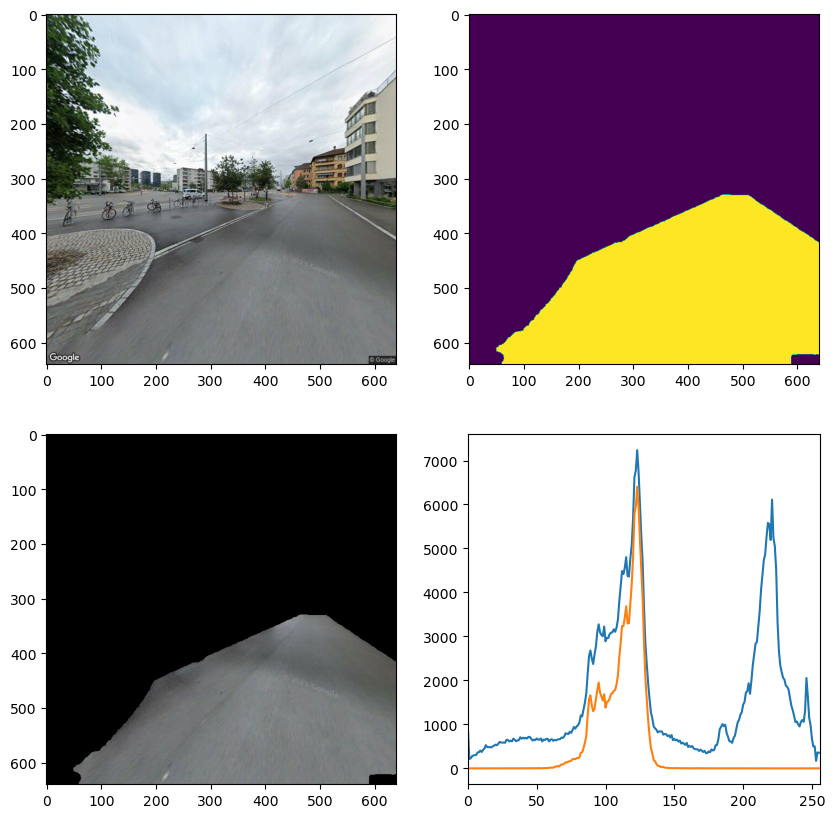

In [2610]:
t = 0
p = ((df2[j]).iloc[t]['mask']) -1
# print(t, p)
i = p
#i = 0
print(i, t,'label')
maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# create a mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
plt.figure(figsize = (10,10))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mb[i])
plt.subplot(223), plt.imshow(maskedimg)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [2362]:
for i in range(0, 10):
    df1[i] = df1[i].assign(Nr = n1[i])
    df2[i] = df2[i].assign(Nr = n2[i])
    df3[i] = df3[i].assign(Nr = n3[i])
    df4[i] = df4[i].assign(Nr = n4[i])

In [2382]:
# Labelling
# Manual Labeling
df1[0] = df1[0].assign(label = ['s', 'pa', 's', 'p', 'r', 'b', 'p', 'p',
                                'bi', 'bi', 'b', 'o', 't', 'b', 'bi', 'b',
                                'b', 'p', 'b', 'v', 'b', 'v', 'p', 'ct',
                                'b', 'p', 'o', 'p', 'o', 'bi', 'p', 'v',
                                'p', 'v', 'h', 'curb', 'o', 'ep', 'o', 'ct',
                                'o',  'curb'])
df1[1] = df1[1].assign(label = ['s', 'r', 'r', 'p', 't', 'p', 'p', 'o',
                                'p', 'r', 'p', 'o', 'p', 'o', 'p', 'h',
                                'pa', 'r', 'o', 'm', 'p', 'p', 'o', 'o', 
                                'o', 'p', 'o','o', 't',  'p', 'o', 'o',
                                'p', 'p', 't', 'r', 'r',  'o', 'rs', 'o',  
                                'rgs', 'p', 'p', 'o', 'p', 'o', 'p', 'o', 
                                'p', 'sl', 'o', 'o', 'sl','o', 'o', 'o',
                                'o', 'ct', 'o'])
df1[2] = df1[2].assign(label = ['r', 's', 'p', 'p', 'b', 't', 'r', 's', 
                                'b', 'p', 'b', 'p', 'p', 'o', 'v', 'p', 
                                'o', 'b', 'b', 'b', 'p', 'vp', 'v', 'b',
                                'p', 'v', 'p', 'b', 'p', 'b', 'p', 'p',
                                'p', 'o', 'p', 'p', 'curb', 'p', 'o', 'vp', 
                                'o', 'v', 'v'])
df1[3] = df1[3].assign(label = ['s', 'r', 's', 'p', 'v', 'o', 'v', 'rgs', 
                                'v', 'p', 'v', 'o', 'v', 'p', 'p', 'o', 
                                'p', 'o', 'p', 'rgs', 'p', 'b', 'o', 'p', 
                                'p', 'p', 'v', 'p', 'p', 'rgs', 'p', 'p', 
                                'o', 'p', 'o', 'o', 'o', 'p', 'o', 'v', 
                                'o', 'rgs', 'o', 'o', 'p', 'p', 'o', 'o', 
                                'v', 't', 'o', 'o', 'mo', 'p', 'p', 'o', 
                                'o', 'o', 'sl'])
df1[4] = df1[4].assign(label = ['s', 'r', 'p', 'v', 'b', 'p', 'p', 'vp', 
                                'rgs', 'p', 'p', 't', 'p', 'r', 'o', 'p', 
                                'pa', 'o', 'rs', 'p', 'p', 'o', 'o', 'rs', 
                                'p', 'p', 'p', 'o', 'o', 'p', 'vp', 'o', 
                                'o', 'o', 'o', 'rs', 'rs', 'o', 'p', 'm', 
                                'vp', 'vp', 'o', 'p', 'vp'])
df1[5] = df1[5].assign(label = ['s', 'b', 's', 'bw', 't', 'ra', 't', 'o', 
                                'b', 'pa', 'o', 'o', 'b', 'o', 'p', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                'o', 'o', 'o'])
df1[6] = df1[6].assign(label = ['v', 'b', 'pa', 'b', 'b', 's', 'v', 'p', 
                                'b', 'b', 'curb', 'o', 't', 'p', 'v', 'v', 
                                'rs', 'o', 'rgs', 'o', 'p', 'o', 'vp', 'o', 
                                'o', 'o', 'rs', 'o', 'p', 'p', 'o', 'o', 
                                'o', 'p', 'o', 'o', 'v', 'v', 'vp', 'o', 
                                'sl', 'vp', 'o', 'b', 'p', 'b', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'v'])
df1[7] = df1[7].assign(label = ['b', 'r', 's', 'b', 'm', 'o', 'o', 'o', 
                                'p', 'o', 'o', 'o', 'r', 'o', 'o', 'b', 
                                'o', 'p', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'b', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'b', 'o', 'p', 'o', 'o', 'p', 'o', 'o', 
                                'p', 'v', 'o', 'v', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'v', 
                                'o', 'v', 'o', 'b'])
df1[8] = df1[8].assign(label = ['s', 'b', 'r', 'pa', 'o', 'o', 'p', 'o',  
                                'p', 't', 'curb', 'p', 'p', 'p', 'o', 'o', 
                                'ct', 'o', 'p', 'o', 'o', 'p', 'ct', 'p', 
                                'p', 'o', 'p', 's', 'o', 'o', 'ct', 'b'])
df1[9] = df1[9].assign(label = ['s', 'r', 'o', 'b', 'bus', 'rgs', 't', 'r',
                                'p', 'm', 'rgs', 'o', 'p', 'curb', 'o', 'o',
                                'o', 'p', 'rgs', 'sl', 'h', 'rgs', 'o', 'o', 
                                'rgs', 'p', 'o', 't', 'h', 'o', 'p', 't',  
                                'o', 'rgs', 'p', 'rgs', 'o', 'p', 'h', 'ep', 
                                'o', 'sw', 'h', 'o', 'o', 'o', 'o', 'o', 
                                'h', 'ep', 'b', 'o', 'o', 'o', 'o', 'o', 
                                'h', 'o', 'o', 'o'])



df2[0] = df2[0].assign(label = ['r', 'pa', 's', 'p', 'b', 'b', 'b', 't',
                                's', 'bi', 'p', 'bi', 'pa', 'o','v', 'pa',
                                'p', 'pa','b','o', 'p','ep', 'bi', 'p',
                                'b', 'b', 'p', 'bi','p', 'p', 'ct', 'bi',
                                'curb', 'b', 'b', 'bi', 'b', 'pa','ep', 'o',
                                'o','o', 'o','o'])
df2[1] = df2[1].assign(label = ['s', 'r', 'p', 's', 'r', 'p','t', 'b', 
                                'b', 'r', 'curb', 'sw', 'curb', 'o', 'o','o',
                                'rgs', 'o', 'o', 'b', 'o', 'p', 'sl', 'o',
                                'rs', 'o', 'sl','p', 'o', 'o', 'o', 'o',
                                'rs', 'p'])
df2[2] = df2[2].assign(label = ['s', 'b', 'r', 'b', 'rgs', 'v', 'b', 'rgs',
                                'rgs', 't', 'p', 'rgs', 's', 'p', 'p', 'o',
                                's', 'pa', 'rgs', 'pa', 'pa', 'p', 'p', 'b',
                                'pa', 'pa', 'rgs', 'o', 'p', 'o', 'b', 'b',
                                'p', 'o', 'p', 'curb', 'sl', 'b', 'p', 'b', 
                                'p', 'pa', 'vp', 'p', 'rgs', 'o', 'rs', 'rgs',
                                'p', 'o', 'p', 'p', 'p', 'rgs', 'o', 'b',
                                'ct', 'o', 'p', 'p'])
df2[3] = df2[3].assign(label = ['s', 'r', 'p', 'p', 'o', 'v', 'p', 't',  
                                'p', 'rgs', 'v', 'p', 'o', 'o', 'vp', 'o',
                                'b', 'v', 'rgs', 'v', 'b', 'o', 'rgs', 'vp',
                                'o', 'o', 'o', 'o', 'o', 'o', 'p', 'b',
                                'p', 'rgs', 'o', 'o', 'o', 'o', 'v', 'o',
                                'o', 'o', 'rgs', 'o', 'o', 'o'])
df2[4] = df2[4].assign(label = ['b', 's', 'v', 'b', 'p', 'r', 'r', 'b', \
                                'vp', 'b', 'p', 'o', 'v', 'p', 's', 't', 
                                'pa', 'p', 'v', 'o', 'p', 'o', 'o', 'o', 
                                'o', 'p', 'b', 'r', 'p', 'pa', 'o', 'vp', 
                                'o', 'o', 'p', 'b', 'p', 'p', 'v', 'o', 
                                'o', 'o', 'b', 'o'])
df2[5] = df2[5].assign(label = ['r', 's', 'ra', 'ra', 'ra', 'bw', 'o', 'o', 
                                'b', 'bw', 'bw', 'bw', 'o', 'v', 'o', 'o', 
                                'o', 'o', 'v', 'o', 'o', 'b', 'curb', 'o', 
                                'b', 'sw', 'o', 'o', 'curb', 'v', 'o', 'o', 
                                'sw', 'o', 'v', 'o', 'o', 'o', 'sw', 'o', 
                                'o', 'o', 'v', 'o' ])
df2[6] = df2[6].assign(label = ['b', 'r', 'b', 's', 'o', 'o', 'o', 't', 
                                'o', 'o', 'o', 't', 'o', 'o', 'p', 'o', 
                                'o', 'p', 'o', 'o', 'o', 'v', 'o', 'o', 
                                'b', 'p', 'p', 'o', 'o', 'o', 'vp', 'o', 
                                'o', 'o', 'p', 'o', 'o', 'o', 'o', 'p', 
                                'vp', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o'])
df2[7] = df2[7].assign(label = ['s', 'r', 'm', 'p', 'train', 's', 'o', 'o', 
                                'train', 'o', 't', 'o', 'o', 'b', 'b', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                'o', 'b', 'o', 'o', 'o', 'o', 'o', 'b', 
                                'o', 'o', 'o', 'pa', 'curb', 'o', 'o', 'o', 
                                'sl', 'm', 'o', 'o', 'o', 'o', 'o', 'p', 
                                'ra', 'r', 'o', 'o', 'pa', 'o', 'b', 'o', 
                                'o', 'o', 'p', 'o', 'o', 'o', 'o', 'sw', 
                                'o', 'o', 'o', 'o', 'o', 'p', 'train', 'o', 
                                'o', 'o', 'm', 'o', 'o', 'o', 'o', 'o'])
df2[8] = df2[8].assign(label = ['s', 'b', 'r', 'o', 'o', 't', 'pa', 'rgs',
                                'p', 'p', 'pa', 'rgs', 'rgs', 'o', 'p', 'ct',
                                'rgs', 'p', 'p', 'p', 'rgs', 'p', 'pa', 'p',
                                'o', 'o', 'p', 'o', 'o', 'p', 'curb', 'v',
                                'o', 'rs', 'p', 'sl', 'rgs', 'o', 'b', 'p',
                                'rgs', 'rgs', 'o', 'o'])
df2[9] = df2[9].assign(label = ['s', 'r', 'o', 'p', 'b', 'o', 'r', 'o',
                                't', 'o', 'r', 'b', 'p', 'b', 'p', 'o',
                                'o', 'curb', 'rgs', 'p', 'm', 'curb', 'b', 'o',
                                'h', 'o', 'p', 'o', 'o', 'o', 'b', 'b',
                                'h', 'o', 'h', 'o', 'o', 'o', 'o', 'o',
                                'o', 'ep', 'b', 'sw', 'sw', 'rgs', 'o', 'o',
                                'o', 'sw', 'o'])


df3[0] = df3[0].assign(label = ['r', 's', 'b', 'pa', 'o', 'm', 'b', 'v',
                                't', 'o', 'o', 'o', 'o', 'o', 'b','o',
                                'o', 'o', 'b', 'o', 'o', 'o', 'post_mailbox', 'p',
                                'b', 'b', 'p', 'p', 'o', 'pa', 'o', 'o',
                                'vp', 'p', 'p', 'o', 'o', 'sw', 'ep', 'ep', 
                                'sw', 'b'])
df3[1] = df3[1].assign(label = ['s', 'p', 'p', 'r', 'p', 't', 'p', 'r',
                                'r', 'b', 'r', 'sw', 'r', 'p', 'sl', 'r', 
                                'o', 'curb', 'rgs', 'ep', 'o', 'rgs', 'p', 'p' ])
df3[2] = df3[2].assign(label = ['s', 'b', 'rgs', 'r', 'r', 'r', 'rgs', 's', 
                                'p', 'rgs', 'p', 'rgs', 'rgs', 'p', 'h', 'p', 
                                'b', 'o', 'p', 'b', 'o', 'p', 'curb', 'curb', 
                                'o', 'pa', 'o', 'o', 'o', 'b', 'o', 'vp', 
                                'o', 'b', 'o', 'p', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'p', 'p', 'b', 'b', 'v', 'pa', 
                                'b', 'vp', 'o', 'p', 'v', 'o', 'o', 'o', 
                                'o', 'o'])
df3[3] = df3[3].assign(label = ['s', 'r', 'p', 'v', 'o', 'v', 'v', 'p', 
                                'p', 'v', 'vp', 'vp', 't', 'p', 'vp', 'vp', 
                                'vp', 'v', 'o', 'rgs', 'vp', 'p', 't', 'o', 
                                'o', 'curb', 'vp', 'p', 'vp', 'o', 'o', 's', 
                                'p', 'p', 'p', 'o', 't', 'o', 'o' ])
df3[4] = df3[4].assign(label = ['s', 'r', 'b', 'pa', 't', 'p', 'v', 'p', 
                                'p', 'm', 'm', 'p', 'p', 'curb', 'p', 'p', 
                                'm', 'bp', 'm', 'p', 'm', 'p', 's', 'p', 
                                'b', 'p', 'mb', 'p', 'b', 'o', 'p', 'b', 
                                'v', 'o', 'p', 'p', 'p', 'o', 'sl' ])
df3[5] = df3[5].assign(label = ['s', 's', 'b', 'b', 'b', 'b', 'r', 'b', 
                                'v', 'o', 'b', 'o', 'o', 'o', 'o', 'ra', 
                                'o', 'v', 'o', 'v', 'o', 'b', 'o', 'v', 
                                'v', 'o', 'o', 'o', 'h', 'o', 'o', 'v' ])
df3[6] = df3[6].assign(label = ['pa', 'b', 'b', 'v', 'v', 'r', 'p', 'b', 
                                'b', 'b', 'o', 'o', 'o', 'o', 't', 'v', 
                                'p', 'o', 'o', 'o', 'p', 'o', 'b', 'o', 
                                'b', 'o', 'o', 'vp', 'v', 'o', 's', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'v', 'p', 
                                'o', 'p', 'o', 'o', 'o', 'b', 'o', 'o', 
                                'o', 'o', 'v', 'o', 'vp'])
df3[7] = df3[7].assign(label = ['s', 'r', 'b', 'train', 'o', 'o', 'o', 't', 
                                'pa', 'train', 'b', 'o', 'o', 'm', 'b', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'p', 'o', 'o', 
                                'o', 'b', 'o', 'p', 'sw', 'b', 'o', 'sw', 
                                'o', 'o', 'p', 'o'])
df3[8] = df3[8].assign(label = ['r', 's', 'b', 'b', 't', 't', 'p', 'pa', 
                                'o', 'o', 'p', 'o', 'p', 'p', 'o', 'p', 
                                'p', 'b', 'b', 'p', 't', 'o', 'p', 'rgs', 
                                'rgs', 'p', 'o', 'p', 'p', 'o', 'o', 'p', 
                                'p', 'p', 'rs', 'p', 'o', 'curb', 'b', 'p', 
                                'b', 'o', 'o', 'p', 'rgs', 'o'])
df3[9] = df3[9].assign(label = ['r', 's', 'b', 'p', 'b', 't', 'r', 'b', 
                                'b', 'b', 'b', 'ts', 'b', 'b', 'r', 't',
                                'b', 'b', 'rgs', 'o', 't', 'o', 'b', 'o', 
                                'o', 'b', 'curb', 'o', 'b', 'p', 'b', 'o', 
                                'p', 'p', 'p', 'b', 'o' ])


df4[0] = df4[0].assign(label = ['s', 'r', 'pa', 'p', 'b', 'b', 'p', 'b', 
                                't', 'o', 'o', 'v', 'm', 'b', 'p', 'v', 
                                'p', 'b', 'o', 'p', 'v', 'o', 'o', 'p', 
                                'o', 'o', 'b', 'b', 'p', 'pa', 'o', 'o', 
                                'p', 'o', 'o', 'o', 'o'])
df4[1] = df4[1].assign(label = ['s', 'o', 'p', 'o', 'p', 'm', 'o', 'o', 
                                'v', 'p', 'o', 'p', 'm', 'p', 'p', 'o', 
                                'p', 'p', 'p', 'o', 'h', 'o', 'p', 'p', 
                                'm', 'o', 'b', 'o', 'o', 'p', 'p', 'o', 
                                'rgs', 'rgs', 'r', 'p', 'p', 'p', 'o', 'o', 
                                'rs', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'ct', 'o'])
df4[2] = df4[2].assign(label = ['r', 's', 'p', 't', 's', 'p', 'p', 'b', 
                                'b', 'b', 'b', 'p', 'o', 'p', 'b', 'b', 
                                'b', 'p', 'p', 'p', 'o', 'b', 'h', 'p', 
                                'p', 'p', 'p', 'b', 'p', 'o', 'h', 'o', 
                                'b', 'o', 'ep', 'o', 'p', 'v', 'o', 'o', 
                                'b', 'o'])
df4[3] = df4[3].assign(label = ['r', 'v', 'v', 's', 'v', 'vp', 'vp', 'p', 
                                'rgs', 'rgs', 'p', 't', 'p', 'p', 'b', 'o', 
                                'v', 'vp', 'vp', 'curb', 'o', 'p', 'o', 'vp', 
                                'o', 'vp', 'o', 'p', 'vp', 'o', 'p', 'o', 
                                'o', 'rs', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'p', 'sl', 'ep', 'o'])
df4[4] = df4[4].assign(label = ['s', 'pa', 's', 'p', 'r', 't', 'r', 'm', 
                                'p', 'p', 'p', 'o', 'p', 'p', 'p', 'p', 
                                'p', 'm', 'o', 'm', 'p', 'o', 'pa', 'p', 
                                'p', 'o', 'p', 'p', 'p', 'rgs', 'p', 'm', 
                                'o', 'm', 'r', 'r', 'p', 'p', 'rgs', 'o', 
                                'o', 'sl', 'p', 'p', 'p', 'o', 'p', 'p', 
                                'sl', 'o', 'o', 'p', 'pa', 'rs'])
df4[5] = df4[5].assign(label = ['s', 'b', 'r', 'ra', 'b', 'ra', 'o', 'bw', 
                                'bw', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 
                                'sw', 'b', 'o', 'o', 'curb', 'b', 'o', 'o', 
                                'curb', 'sw'])
df4[6] = df4[6].assign(label = ['v', 'b', 's', 'b', 'v', 'r', 'b', 'v', 
                                'r', 'rgs', 'vp', 'vp', 'b', 'vp', 'v', 'v', 
                                'v', 'v', 't', 'v', 'v', 'p', 'sl', 'vp', 
                                'rs', 'sl', 'o', 'o', 'v', 'vp', 'o'])
df4[7] = df4[7].assign(label = ['r', 's', 'b', 'train', 'pa', 'o', 'b', 'b', 
                                't', 'b', 'b', 'b', 'o', 'v', 'o', 'o', 
                                'b', 'v', 'p', 'o', 'b', 'o', 'p', 'sw', 
                                'v', 'o', 'o', 'curb', 'o', 'o', 'o', 'sl', 
                                'b', 'o', 'o', 'o', 'p'])
df4[8] = df4[8].assign(label = ['s', 'o', 'r', 'b', 'o', 'p', 'p', 'o', 
                                'p', 'pa', 't', 'p', 'p', 'o', 'p', 'rs', 
                                'p', 'p', 'p', 'p', 't', 'o', 'p', 'rgs', 
                                'p', 'o', 'p', 'p', 'p', 'p', 'rs', 'pa', 
                                'p', 'p', 'o', 'p', 'm', 'rgs', 'o', 'p', 
                                'p', 'rgs', 'rs', 'rgs', 'p', 'o', 'o', 'o', 
                                'o', 'o'])
df4[9] = df4[9].assign(label = ['s', 'train', 'r', 'b', 'r', 'b', 't', 'b', 
                                'p', 'o', 'b', 'curb', 'rgs', 'r', 'v', 'p', 
                                'p', 'o', 'o', 'v', 'b', 'o', 'r', 'o', 
                                'o', 'o', 'sl', 'p', 'curb', 'o', 'curb', 'b', 
                                'o', 'o', 'p', 'b', 'o', 'o', 'o', 'o', 
                                'sl', 'o', 'rgs', 'b', 'curb', 'o', 'o', 'h', 
                                'o', 'sw', 't', 'o', 'rgs', 'o', 'o', 'o', 
                                'sw', 'rgs', 'o', 'sw', 'o', 'o', 'o'])


In [2383]:
df_curb = pd.DataFrame()

In [2384]:
for i in range(0,10):
    dfi = df1[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    df_curb = pd.concat([df_curb, dfic])


In [2385]:
df_curb

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,Nr,label
36,37,136.0,137.0,134.0,134.012319,133.723621,130.664167,40.583695,40.45549,39.941001,...,0.646047,23.374829,0.553211,33.520649,27.305327,420.149276,1.0,1.0,999000608525971,curb
42,43,146.0,145.0,141.0,144.754717,144.268505,140.157475,17.221874,17.422036,17.144202,...,0.271579,4.291667,0.206126,39.32365,2.0519,385.88939,-1.0,-1.0,999000608525971,curb
37,38,147.0,116.0,145.0,144.381842,113.368491,141.754339,36.137713,36.565911,37.018719,...,0.783042,14.956779,0.67694,28.277101,25.889252,254.911687,1.0,1.0,999000527235101,curb
10,11,97.0,96.0,100.0,98.405529,97.829451,101.500544,15.845957,16.355386,16.63339,...,0.941239,0.162131,0.571356,105.863376,13.401971,695.494508,1.0,1.0,999000466623001,curb
11,12,200.0,177.0,206.0,182.715519,166.65564,187.292581,38.612772,41.268839,37.897827,...,0.849433,24.538364,0.736828,126.421277,42.909823,1384.658942,1.0,1.0,999000601646161,curb
14,15,140.0,128.0,145.0,133.099011,120.500363,138.436882,49.375908,49.313448,48.633175,...,0.929056,17.157142,0.638659,115.494996,69.053526,1138.090401,1.0,1.0,999000495072791,curb


In [2386]:
for i in range(0,10):
    dfi = df2[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    df_curb = pd.concat([df_curb, dfic])
for i in range(0,10):
    dfi = df3[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    df_curb = pd.concat([df_curb, dfic])
for i in range(0,10):
    dfi = df4[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    df_curb = pd.concat([df_curb, dfic])

In [2387]:
df_curb

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,Nr,label
36,37,136.0,137.0,134.0,134.012319,133.723621,130.664167,40.583695,40.45549,39.941001,...,0.646047,23.374829,0.553211,33.520649,27.305327,420.149276,1.0,1.0,999000608525971,curb
42,43,146.0,145.0,141.0,144.754717,144.268505,140.157475,17.221874,17.422036,17.144202,...,0.271579,4.291667,0.206126,39.32365,2.0519,385.88939,-1.0,-1.0,999000608525971,curb
37,38,147.0,116.0,145.0,144.381842,113.368491,141.754339,36.137713,36.565911,37.018719,...,0.783042,14.956779,0.67694,28.277101,25.889252,254.911687,1.0,1.0,999000527235101,curb
10,11,97.0,96.0,100.0,98.405529,97.829451,101.500544,15.845957,16.355386,16.63339,...,0.941239,0.162131,0.571356,105.863376,13.401971,695.494508,1.0,1.0,999000466623001,curb
11,12,200.0,177.0,206.0,182.715519,166.65564,187.292581,38.612772,41.268839,37.897827,...,0.849433,24.538364,0.736828,126.421277,42.909823,1384.658942,1.0,1.0,999000601646161,curb
14,15,140.0,128.0,145.0,133.099011,120.500363,138.436882,49.375908,49.313448,48.633175,...,0.929056,17.157142,0.638659,115.494996,69.053526,1138.090401,1.0,1.0,999000495072791,curb
33,34,134.0,134.0,132.0,123.580189,122.729363,120.767099,44.92333,44.850885,44.492533,...,0.798283,0.052126,0.579404,43.526778,47.283196,486.901583,1.0,1.0,999000608525972,curb
11,12,96.0,85.0,94.0,91.120361,80.729431,88.903377,23.627236,20.963211,23.553854,...,0.925987,6.685039,0.760482,60.000707,21.647836,366.291411,1.0,1.0,999000630186112,curb
13,14,96.0,85.0,94.0,91.251519,80.90206,89.046928,23.550108,20.875013,23.473292,...,0.925455,6.558012,0.755752,59.702882,43.674866,361.462984,1.0,1.0,999000630186112,curb
36,37,190.0,166.0,206.0,182.62254,158.833631,198.942755,28.576588,27.630113,29.788826,...,0.911896,0.115762,0.690215,36.028707,11.311139,243.747254,1.0,1.0,999000527235102,curb


In [2432]:
df_curb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 36 to 45
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mask               31 non-null     int64 
 1   gmedian            31 non-null     object
 2   rmedian            31 non-null     object
 3   bmedian            31 non-null     object
 4   gmean              31 non-null     object
 5   rmean              31 non-null     object
 6   bmean              31 non-null     object
 7   gstd               31 non-null     object
 8   rstd               31 non-null     object
 9   bstd               31 non-null     object
 10  isconvex           31 non-null     object
 11  area               31 non-null     object
 12  aspect_ratio_wh_s  31 non-null     object
 13  extent_s           31 non-null     object
 14  solidity           31 non-null     object
 15  aspect_ratio_wh    31 non-null     object
 16  extent             31 non-null     object
 17  ed 

In [2433]:
dfc = df_curb.drop(['label'], axis=1)
dfc = dfc.astype('float')

In [2434]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 36 to 45
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               31 non-null     float64
 1   gmedian            31 non-null     float64
 2   rmedian            31 non-null     float64
 3   bmedian            31 non-null     float64
 4   gmean              31 non-null     float64
 5   rmean              31 non-null     float64
 6   bmean              31 non-null     float64
 7   gstd               31 non-null     float64
 8   rstd               31 non-null     float64
 9   bstd               31 non-null     float64
 10  isconvex           31 non-null     float64
 11  area               31 non-null     float64
 12  aspect_ratio_wh_s  31 non-null     float64
 13  extent_s           31 non-null     float64
 14  solidity           31 non-null     float64
 15  aspect_ratio_wh    31 non-null     float64
 16  extent             31 non-null  

In [2435]:
funct = [np.mean, np.median, np.min, np.max, np.std]

# use agg() to apply all functs to dataframe
summary = dfc.agg(funct)

In [2436]:
summary


,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,extent_s,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,Nr
mean,26.258065,149.129032,136.758065,153.048387,143.760543,132.132431,147.802922,34.203134,33.405780,34.442691,...,0.175488,0.837821,8.440454,0.642094,50.403429,56.322922,448.414038,0.935484,0.806452,9.990006e+14
median,26.000000,144.000000,137.000000,143.000000,139.309783,133.723621,140.157475,36.137713,34.047881,37.018719,...,0.149505,0.881033,6.558012,0.659483,42.000874,24.698039,378.249781,1.000000,1.000000,9.990005e+14
amin,11.000000,63.000000,55.000000,66.000000,89.028969,79.259560,88.903377,15.845957,16.355386,16.414886,...,0.052457,0.271579,0.036224,0.206126,19.314740,2.051900,138.024385,-1.000000,-1.000000,9.990005e+14
amax,46.000000,209.000000,187.000000,219.000000,191.878557,174.962138,201.398763,55.954678,55.502055,57.131624,...,0.474242,0.943485,26.626892,0.814313,126.421277,487.911969,1384.658942,1.000000,1.000000,9.990006e+14
std,9.784231,43.047642,38.186139,47.058537,35.655368,32.222019,39.706319,10.329661,10.490204,10.318881,...,0.115771,0.136491,8.556865,0.126017,25.906021,101.365717,275.807099,0.359211,0.601074,5.737654e+07


In [2438]:
dfc.describe().to_csv("curb_description.csv")

In [2417]:
np.mean(df_curb['extent_s'])

0.1754878081411034

In [2440]:
summary.to_csv('/home/yelhe/script/mt/sum.csv',index = False)

(array([2., 0., 4., 1., 4., 8., 1., 0., 4., 7.]),
 array([ 63. ,  77.6,  92.2, 106.8, 121.4, 136. , 150.6, 165.2, 179.8,
        194.4, 209. ]),
 <BarContainer object of 10 artists>)

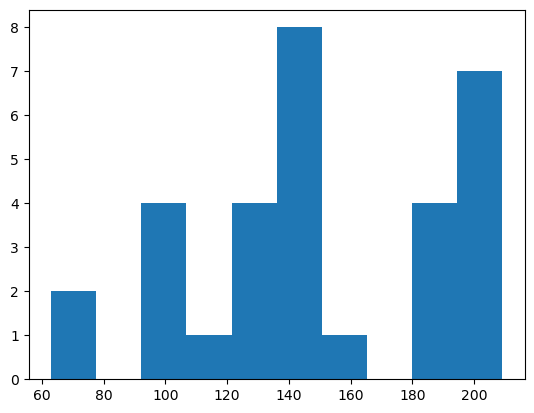

In [2466]:
# hist_c = np.histogram(df_curb['gmedian'])
# plt.hist(hist_c)
# counts, bins = np.histogram(dfc['gmedian'])
plt.hist(dfc['gmedian'])

(array([2., 0., 3., 1., 5., 4., 4., 0., 4., 8.]),
 array([ 55. ,  68.2,  81.4,  94.6, 107.8, 121. , 134.2, 147.4, 160.6,
        173.8, 187. ]),
 <BarContainer object of 10 artists>)

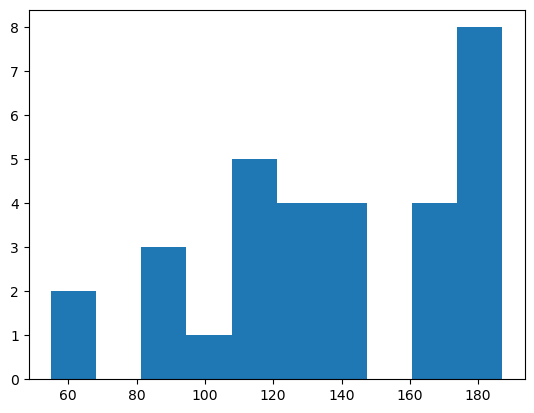

In [2467]:
# counts, bins = np.histogram(dfc['rmedian'])
# plt.stairs(counts, bins)
plt.hist(dfc['rmedian'])

(array([2., 3., 1., 1., 8., 5., 0., 0., 2., 9.]),
 array([ 66. ,  81.3,  96.6, 111.9, 127.2, 142.5, 157.8, 173.1, 188.4,
        203.7, 219. ]),
 <BarContainer object of 10 artists>)

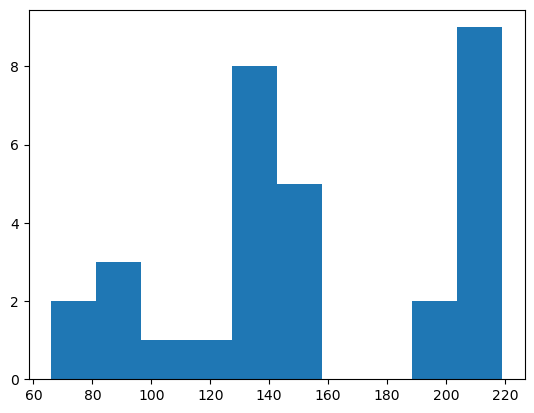

In [2468]:
# counts, bins = np.histogram(dfc['bmedian'])
# plt.stairs(counts, bins)
plt.hist(dfc['bmedian'])

(array([6., 0., 2., 3., 5., 2., 2., 0., 2., 9.]),
 array([ 89.02896871,  99.31392751, 109.59888631, 119.88384511,
        130.16880391, 140.45376271, 150.73872151, 161.0236803 ,
        171.3086391 , 181.5935979 , 191.8785567 ]),
 <BarContainer object of 10 artists>)

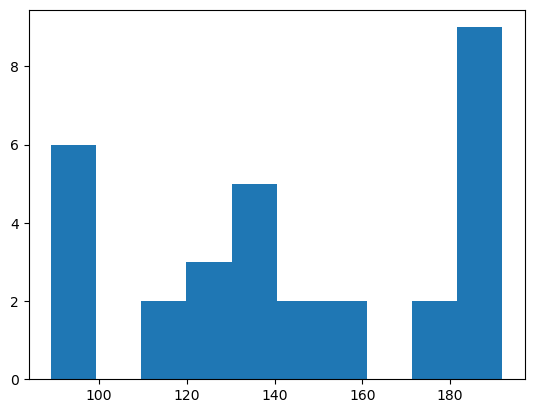

In [2469]:
# counts, bins = np.histogram(dfc['gmean'])
# plt.stairs(counts, bins)
plt.hist(dfc['gmean'])

(array([5., 1., 2., 3., 3., 2., 2., 2., 6., 5.]),
 array([ 79.25955968,  88.82981752,  98.40007536, 107.9703332 ,
        117.54059104, 127.11084888, 136.68110672, 146.25136456,
        155.8216224 , 165.39188024, 174.96213808]),
 <BarContainer object of 10 artists>)

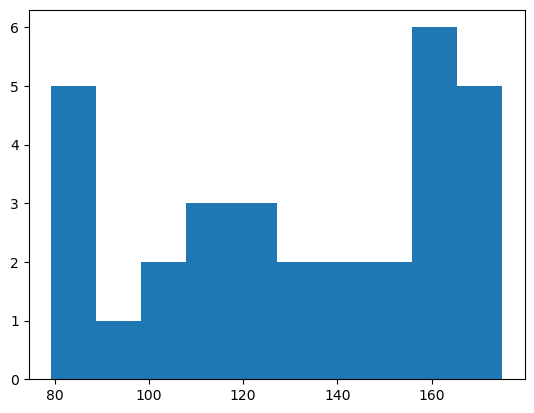

In [2470]:
# counts, bins = np.histogram(dfc['rmean'])
# plt.stairs(counts, bins)
plt.hist(dfc['rmean'])

(array([5., 1., 3., 4., 6., 1., 0., 0., 2., 9.]),
 array([ 88.9033768 , 100.15291541, 111.40245401, 122.65199262,
        133.90153123, 145.15106984, 156.40060845, 167.65014706,
        178.89968567, 190.14922428, 201.39876289]),
 <BarContainer object of 10 artists>)

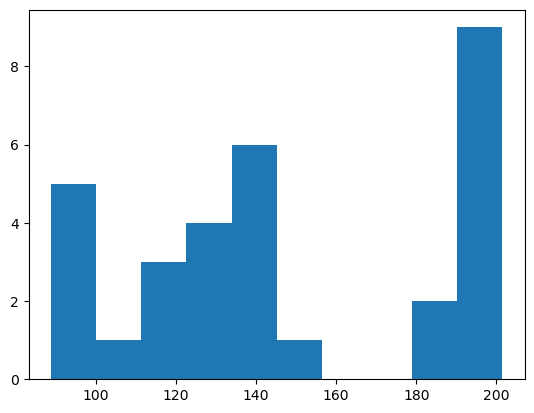

In [2471]:
# counts, bins = np.histogram(dfc['bmean'])
# plt.stairs(counts, bins)
plt.hist(dfc['bmean'])

(array([ 3.,  3.,  2.,  6.,  1., 10.,  1.,  1.,  2.,  2.]),
 array([15.84595728, 19.8568294 , 23.86770152, 27.87857363, 31.88944575,
        35.90031787, 39.91118999, 43.9220621 , 47.93293422, 51.94380634,
        55.95467846]),
 <BarContainer object of 10 artists>)

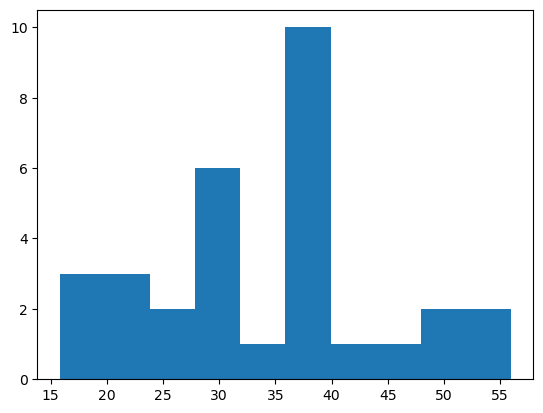

In [2472]:
# counts, bins = np.histogram(dfc['gstd'])
# plt.stairs(counts, bins)
plt.hist(dfc['gstd'])

(array([3., 3., 5., 3., 5., 4., 3., 1., 2., 2.]),
 array([16.35538648, 20.27005331, 24.18472014, 28.09938698, 32.01405381,
        35.92872064, 39.84338748, 43.75805431, 47.67272114, 51.58738798,
        55.50205481]),
 <BarContainer object of 10 artists>)

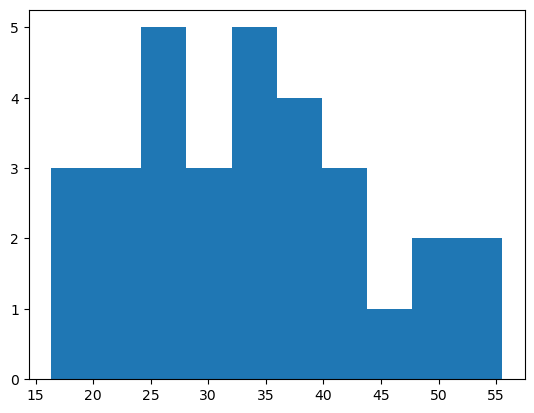

In [2473]:
# counts, bins = np.histogram(dfc['rstd'])
# plt.stairs(counts, bins)
plt.hist(dfc['rstd'])

(array([ 3.,  3.,  3.,  5.,  1., 11.,  1.,  2.,  0.,  2.]),
 array([16.41488558, 20.48655938, 24.55823319, 28.62990699, 32.70158079,
        36.77325459, 40.8449284 , 44.9166022 , 48.988276  , 53.0599498 ,
        57.13162361]),
 <BarContainer object of 10 artists>)

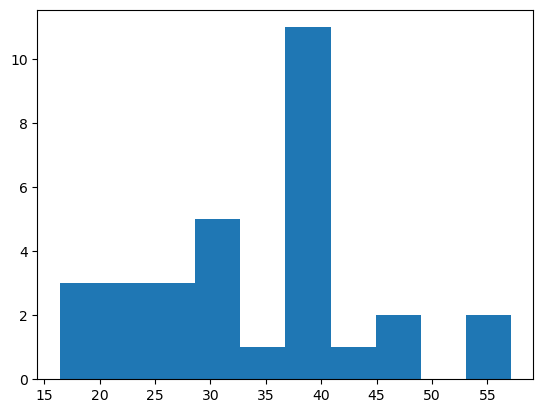

In [2474]:
# counts, bins = np.histogram(dfc['bstd'])
# plt.stairs(counts, bins)
plt.hist(dfc['bstd'])

(array([ 0.,  0.,  0.,  0.,  0., 31.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

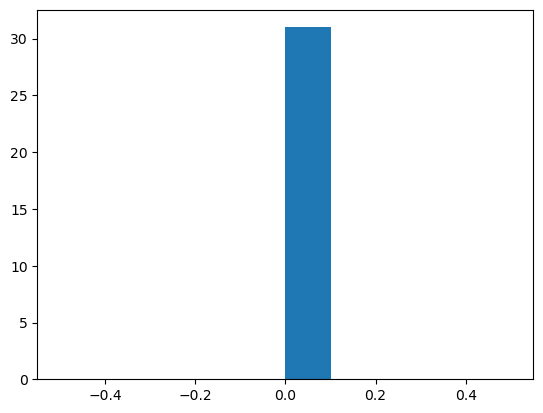

In [2475]:
# counts, bins = np.histogram(dfc['isconvex'])
# plt.stairs(counts, bins)
plt.hist(dfc['isconvex'])

(array([19.,  5.,  2.,  2.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([  293.  ,  1518.95,  2744.9 ,  3970.85,  5196.8 ,  6422.75,
         7648.7 ,  8874.65, 10100.6 , 11326.55, 12552.5 ]),
 <BarContainer object of 10 artists>)

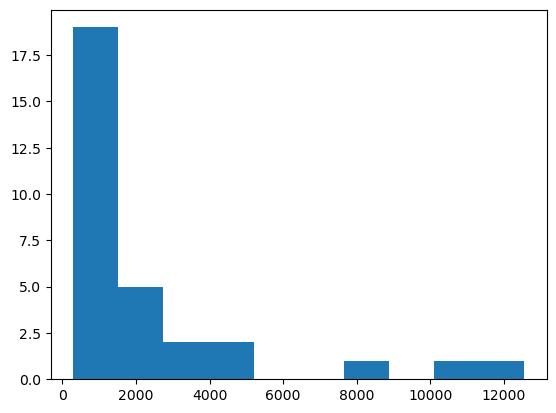

In [2476]:
# counts, bins = np.histogram(dfc['area'])
# plt.stairs(counts, bins)
plt.hist(dfc['area'])

(array([ 9., 12.,  4.,  2.,  0.,  1.,  0.,  2.,  0.,  1.]),
 array([0.64122137, 1.42154368, 2.20186599, 2.9821883 , 3.7625106 ,
        4.54283291, 5.32315522, 6.10347752, 6.88379983, 7.66412214,
        8.44444444]),
 <BarContainer object of 10 artists>)

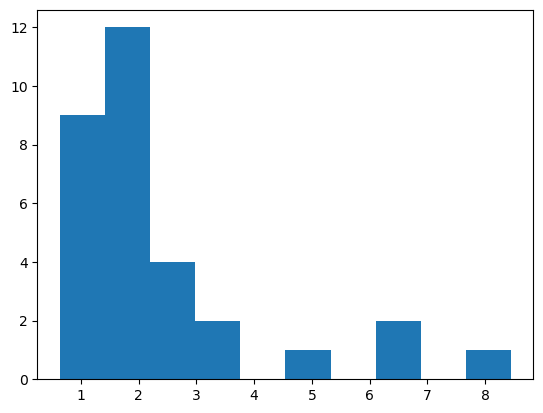

In [2477]:
# counts, bins = np.histogram(dfc['aspect_ratio_wh_s'])
# plt.stairs(counts, bins)
plt.hist(dfc['aspect_ratio_wh_s'])

(array([13.,  2.,  3.,  2.,  5.,  2.,  1.,  1.,  1.,  1.]),
 array([0.05245722, 0.09463574, 0.13681426, 0.17899278, 0.2211713 ,
        0.26334982, 0.30552834, 0.34770686, 0.38988538, 0.4320639 ,
        0.47424242]),
 <BarContainer object of 10 artists>)

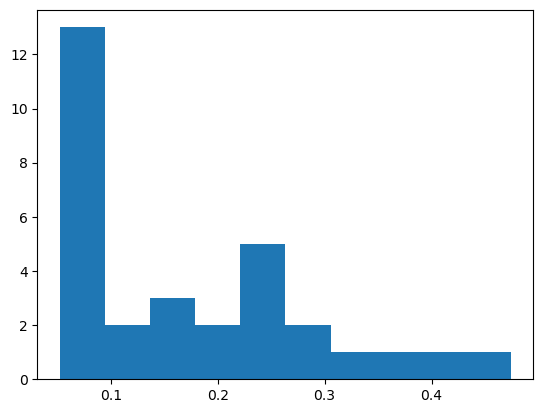

In [2478]:
# counts, bins = np.histogram(dfc['extent_s'])
# plt.stairs(counts, bins)
plt.hist(dfc['extent_s'])

(array([ 1.,  0.,  0.,  0.,  0.,  3.,  0.,  6.,  3., 18.]),
 array([0.27157871, 0.33876935, 0.40595999, 0.47315062, 0.54034126,
        0.6075319 , 0.67472254, 0.74191317, 0.80910381, 0.87629445,
        0.94348509]),
 <BarContainer object of 10 artists>)

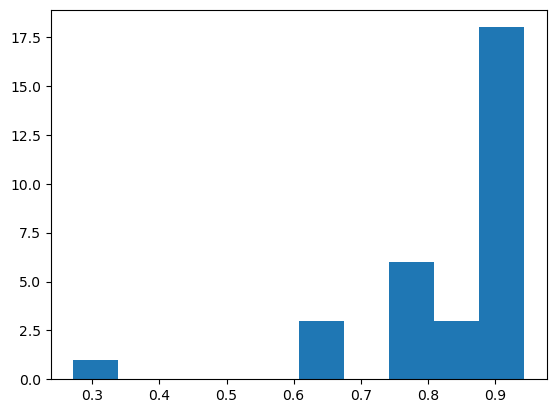

In [2479]:
# counts, bins = np.histogram(dfc['solidity'])
# plt.stairs(counts, bins)
plt.hist(dfc['solidity'])

(array([12.,  1.,  5.,  1.,  2.,  5.,  1.,  0.,  2.,  2.]),
 array([ 0.0362241 ,  2.69529091,  5.35435773,  8.01342454, 10.67249135,
        13.33155817, 15.99062498, 18.6496918 , 21.30875861, 23.96782542,
        26.62689224]),
 <BarContainer object of 10 artists>)

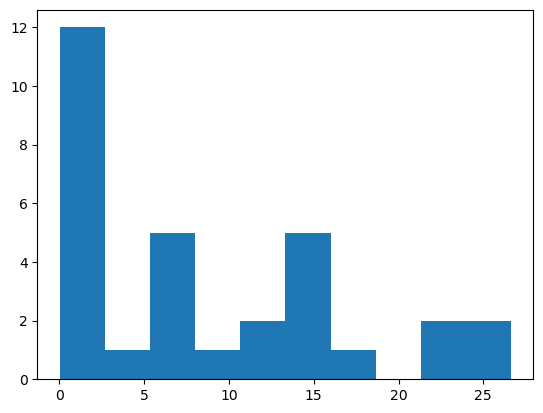

In [2481]:
# counts, bins = np.histogram(dfc['aspect_ratio_wh'])
# plt.stairs(counts, bins)
plt.hist(dfc['aspect_ratio_wh'])

(array([1., 0., 0., 0., 3., 3., 4., 9., 5., 6.]),
 array([0.20612606, 0.26694475, 0.32776344, 0.38858213, 0.44940083,
        0.51021952, 0.57103821, 0.6318569 , 0.69267559, 0.75349429,
        0.81431298]),
 <BarContainer object of 10 artists>)

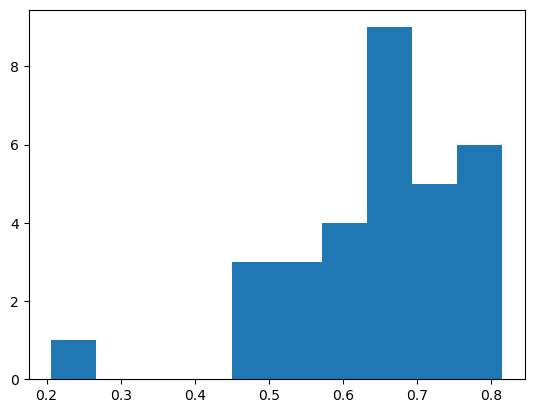

In [2482]:
# counts, bins = np.histogram(dfc['extent'])
# plt.stairs(counts, bins)
plt.hist(dfc['extent'])

(array([6., 8., 6., 6., 0., 2., 0., 0., 2., 1.]),
 array([ 19.31474014,  30.02539387,  40.7360476 ,  51.44670132,
         62.15735505,  72.86800878,  83.57866251,  94.28931624,
        104.99996997, 115.71062369, 126.42127742]),
 <BarContainer object of 10 artists>)

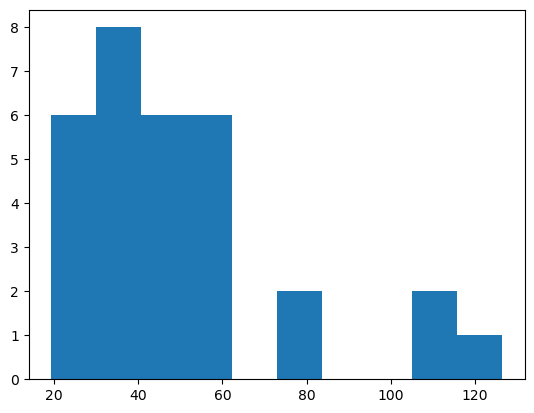

In [2483]:
# counts, bins = np.histogram(dfc['ed'])
# plt.stairs(counts, bins)
plt.hist(dfc['ed'])

(array([26.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([  2.0519003 ,  50.63790722,  99.22391413, 147.80992105,
        196.39592797, 244.98193489, 293.56794181, 342.15394872,
        390.73995564, 439.32596256, 487.91196948]),
 <BarContainer object of 10 artists>)

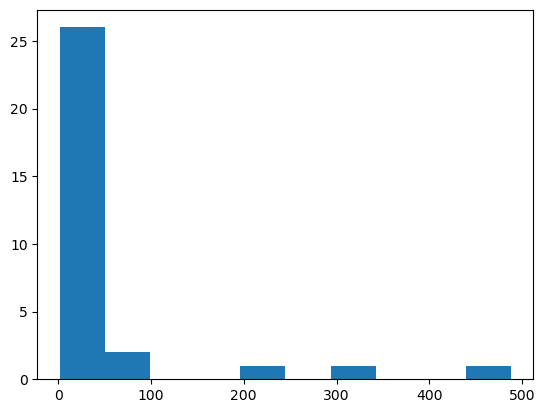

In [2485]:
# counts, bins = np.histogram(dfc['ratio_ell'])
# plt.stairs(counts, bins)
plt.hist(dfc['ratio_ell'])

(array([ 7., 10.,  7.,  1.,  3.,  1.,  0.,  0.,  1.,  1.]),
 array([ 138.02438509,  262.6878408 ,  387.3512965 ,  512.0147522 ,
         636.6782079 ,  761.3416636 ,  886.0051193 , 1010.668575  ,
        1135.3320307 , 1259.9954864 , 1384.6589421 ]),
 <BarContainer object of 10 artists>)

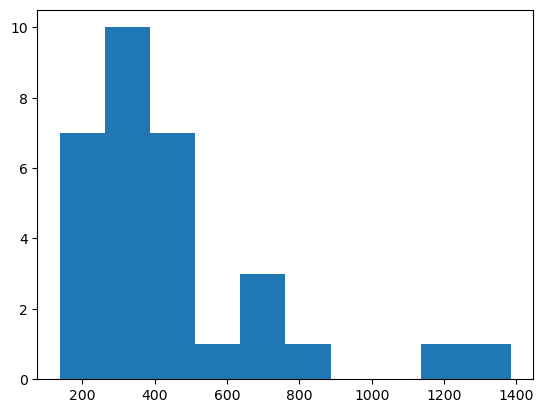

In [2486]:
# counts, bins = np.histogram(dfc['perimeter'])
# plt.stairs(counts, bins)
plt.hist(dfc['perimeter'])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

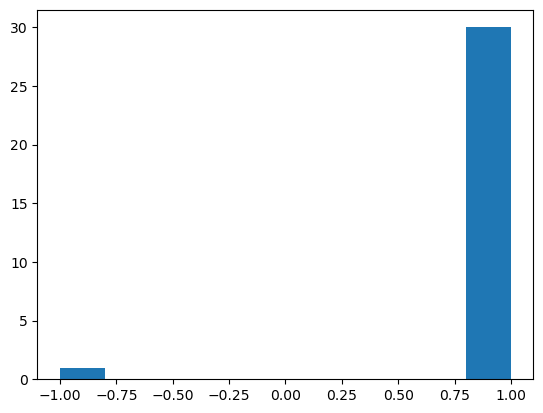

In [2487]:
# counts, bins = np.histogram(dfc['is_cen_inside'])
# plt.stairs(counts, bins)
plt.hist(dfc['is_cen_inside'])

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

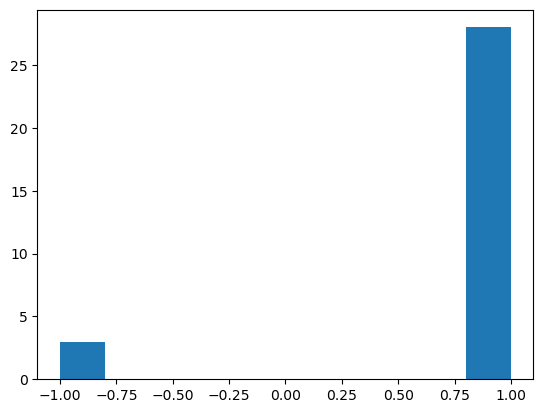

In [2488]:
# counts, bins = np.histogram(dfc['is_mce_inside'])
# plt.stairs(counts, bins)
plt.hist(dfc['is_mce_inside'])

In [ ]:
# Function to find and plot filtered contours (find-filter-plot-contour)
# Run for each mask of each image
def ffpcontour_noplot(image, mask, i):
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ll = [] # length list
    for i in range(0, len(contours)):
          ll.append(len(contours[i]))
    maxl = max(ll)
    maxindex = ll.index(maxl)
    if (len(contours) == 1) and (maxl >= 6):
        contour_f = contours
    elif (maxl>=80) :
        contour_f = []
        for i in range(0, len(contours)):
        # print(i, "len", len(contours[i]))
            if (len(contours[i]) >= 80):
                contour_f.append(contours[i])
            else:
                contour_f = contour_f
    elif (maxl >= 6):
        contour_f = []
        contour_f.append(contours[maxindex])
    else: 
        contour_f = []
    # print("filtered", "len", len(contour_f), contour_f) 
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    return contour_f

In [ ]:
# j = 1
# mb = mask1f[j]
# img = gsv_image1[j]


In [ ]:

# print(j)
# t = 32
# print(t)
# ret, thresh = cv2.threshold((mb[t]*255), 127, 255, 0)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# ll = [] # length list
# for i in range(0, len(contours)):
#     ll.append(len(contours[i]))
# maxl = max(ll)
# maxindex = ll.index(maxl)
# print(ll)
# print(maxindex)

In [ ]:
# i = t
# #i = 0
# print(i)
# maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# img_con = cv2.drawContours(maskedimg, contours, -1, (0,255,0), 3) 
# # create a mask
# hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
# hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
# plt.figure(figsize = (10,10))
# plt.subplot(221), plt.imshow(img)
# plt.subplot(222), plt.imshow(mb[i])
# plt.subplot(223), plt.imshow(img_con)
# plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
# plt.xlim([0,256])
# plt.show()

In [ ]:
# print(j)
# leng = []
# for i in range(0,len(mb)):
#     leng.append(len(ffpcontour_noplot(img, mb, i)))
# print(leng)
# print(len(mb), len(leng))

In [2571]:
ra = list(range(0, 295))

In [2572]:
# Random choose accidents
il = random.sample(ra, 10)
print(il)

[112, 164, 222, 77, 35, 15, 187, 167, 26, 69]


TypeError: list indices must be integers or slices, not list

In [2573]:
koord_s = koord.iloc[il]

In [2624]:
koord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Koord E  350 non-null    int64  
 1   Koord N  350 non-null    int64  
 2   lon      350 non-null    float64
 3   lat      350 non-null    float64
 4   url1     350 non-null    object 
 5   url2     350 non-null    object 
 6   url3     350 non-null    object 
 7   url4     350 non-null    object 
 8   Nr       350 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 24.7+ KB


In [2574]:
koord_s

,Koord E,Koord N,lon,lat,url1,url2,url3,url4,Nr
112,2681971,1246936,8.523871,47.368167,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900056845988
164,2682539,1247518,8.531498,47.373330,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900051112813
222,2683046,1247563,8.538218,47.373671,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900060344083
77,2681368,1249988,8.516444,47.395690,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900061813512
35,2680492,1247290,8.504356,47.371533,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900063434833
15,2679395,1248915,8.490122,47.386280,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900059526351
187,2682734,1248061,8.534180,47.378189,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900052412836
167,2682565,1246584,8.531670,47.364927,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900061415325
26,2680041,1247957,8.498505,47.377587,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900056946259
69,2681204,1247885,8.513890,47.376797,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,https://maps.googleapis.com/maps/api/streetvie...,99900057250698


In [2575]:
r1 = koord_s.Nr.astype(str) + '1'
r2 = koord_s.Nr.astype(str) + '2'
r3 = koord_s.Nr.astype(str) + '3'
r4 = koord_s.Nr.astype(str) + '4'

In [2576]:
r1 = [str(element) for element in r1]
r2 = [str(element) for element in r2]
r3 = [str(element) for element in r3]
r4 = [str(element) for element in r4]

In [2613]:
r1

['999000568459881',
 '999000511128131',
 '999000603440831',
 '999000618135121',
 '999000634348331',
 '999000595263511',
 '999000524128361',
 '999000614153251',
 '999000569462591',
 '999000572506981']

In [2614]:
df1r = []
for i in range(0, 10):
    a = il[i]
    print(a)
    df1r.append(feature_summary(gsv_image1[a], mask1f[a]))
    # print(i)
df2r = []
df3r = []
df4r = []
for i in range(0, 10):
    a = il[i]
    df2r.append(feature_summary(gsv_image2[a], mask2f[a]))
    df3r.append(feature_summary(gsv_image3[a], mask3f[a]))
    df4r.append(feature_summary(gsv_image4[a], mask4f[a]))
    # print(i)

112
164
222
77
35
15
187
167
26
69


In [2612]:
j = 0
q = il[j]
print(j, q, r1[j])
mb = mask1f[q]
img = gsv_image1[q]
df1r[j].info()

0 112 999000568459881
<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 42
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mask               42 non-null     int64 
 1   gmedian            42 non-null     object
 2   rmedian            42 non-null     object
 3   bmedian            42 non-null     object
 4   gmean              42 non-null     object
 5   rmean              42 non-null     object
 6   bmean              42 non-null     object
 7   gstd               42 non-null     object
 8   rstd               42 non-null     object
 9   bstd               42 non-null     object
 10  isconvex           42 non-null     object
 11  area               42 non-null     object
 12  aspect_ratio_wh_s  42 non-null     object
 13  extent_s           42 non-null     object
 14  solidity           42 non-null     object
 15  aspect_ratio_wh    42 non-null     object
 16  extent             42 non-nul

0 0 label


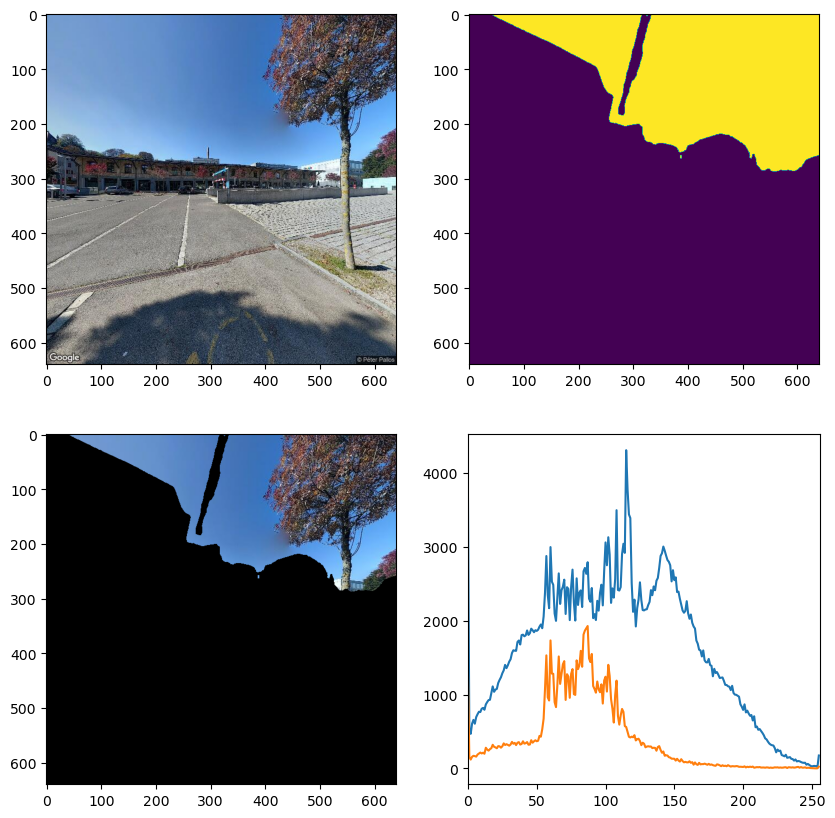

In [2616]:
t = 0
p = ((df1r[j]).iloc[t]['mask']) -1
# print(t, p)
i = p
#i = 0
print(i, t,'label')
maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# create a mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
plt.figure(figsize = (10,10))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mb[i])
plt.subplot(223), plt.imshow(maskedimg)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()